# RESTful Face API Usage Example 🐸

# 1. Face Detection

*Need Valid API Token. Please include  **```Authorization: Token <your token>```**  in HTTP request header. **```Token```** is surrounded by 2 spaces.*

**Request parameters**:
- image: the image data. (opened with function `open()`)
- appID: the applicaiton where your service is executed

**Response data**:
- faces: a list of 
    - data: face data; a list of 3-list [R, G, B]. (flattened with row first)
    - size: the size of face; a tuple (width, heigh)


/Users/luzhoutao/anaconda/envs/python2.7/lib/python2.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


('time: ', datetime.timedelta(0, 44, 612466))


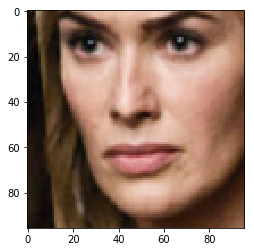

('origin size: ', [124, 125])
('crop size: ', [96, 96])


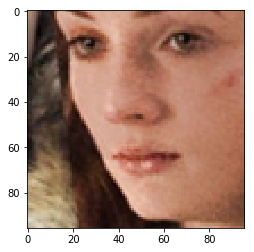

('origin size: ', [124, 124])
('crop size: ', [96, 96])


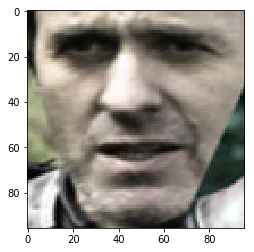

('origin size: ', [104, 104])
('crop size: ', [96, 96])


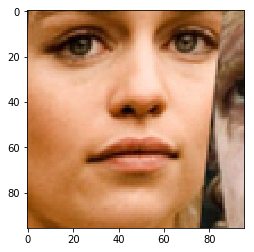

('origin size: ', [124, 124])
('crop size: ', [96, 96])


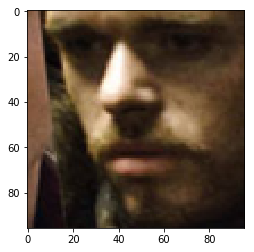

('origin size: ', [125, 124])
('crop size: ', [96, 96])


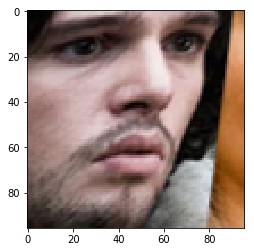

('origin size: ', [124, 125])
('crop size: ', [96, 96])


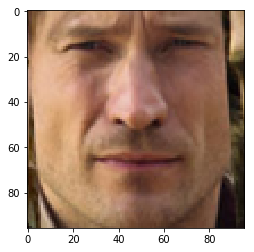

('origin size: ', [125, 124])
('crop size: ', [96, 96])


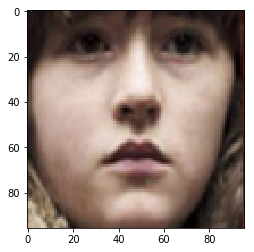

('origin size: ', [104, 104])
('crop size: ', [96, 96])


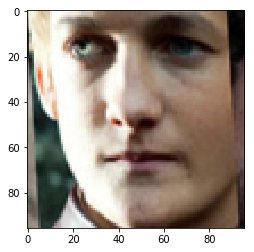

('origin size: ', [124, 124])
('crop size: ', [96, 96])


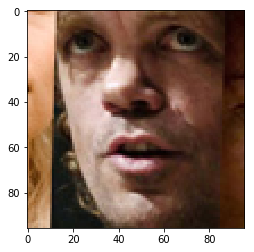

('origin size: ', [149, 149])
('crop size: ', [96, 96])


In [16]:
# Web request
import requests
import os
# Image manipulation
from PIL import Image
from pylab import *

from datetime import datetime

host = 'https://face.d1.comp.nus.edu.sg/' # host address of our API
resource = 'commands/face_detection/' # resouce link

api_key = '1c125f503d6b3d17c7c741deae4859e3e8ea42f7' # your token
appID = '1430418428' # the appID of target app

# send requests
files = {'image': open('got.jpg', 'rb')}
data = {'appID': appID}
headers = {'Authorization': 'Token ' + api_key}

start = datetime.now()
response = requests.post(os.path.join(host, resource), files=files, data=data, headers=headers, verify=False)
print('time: ', datetime.now()-start)

if response.status_code == '401':
    print('Invalid token!')

# receive response
faces = response.json()['faces']

# show the results
face_images = []
for face in faces:
    face_data = [(pixel[0], pixel[1], pixel[2]) for pixel in face['data']] # convert to tuple

    face_image = Image.new(mode='RGB', size=face['size'])
    face_image.putdata(face_data)
    face_images.append(face_image)
    
    figure()
    imshow(face_image)
    show()
    print('origin size: ', face['origin_size'])
    print('crop size: ', face['size'])

# 2. Face Enrollment

*Need Valid API Token. Please include  **```Authorization: Token <your token>```**  in HTTP request header. **```Token```** is surrounded by 2 spaces.*

**Request parameter**
- appID: the application where the face is enrolled
- userID: the person that the face is enrolled with
- name: the person that the face is enrolled with *specify `userID` or `name` * 
- image: the face to be enrolled. (**Must** be the face returned from ```detection``` service with width of 150 pixel and height of 170 pixel. Uploaded in format of opened file)

**Response data**:

- if successful,
    - information about the face obejct, including `image`, `person`, `created_time`, `modified_time`

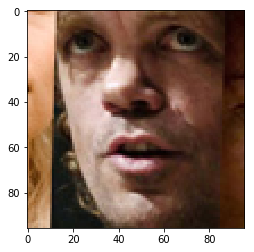

/Users/luzhoutao/anaconda/envs/python2.7/lib/python2.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{u'url': u'https://face.d1.comp.nus.edu.sg/faces/1/', u'image': u'https://face.d1.comp.nus.edu.sg/media/faces/1430418428/u1591799618/170829/image', u'modified_time': u'2017-08-29', u'person': u'https://face.d1.comp.nus.edu.sg/persons/2/', u'created_time': u'2017-08-29', u'id': 1}


In [15]:
##################################################
# for showing the example
# this should be replaced with actual file open, while using this interface in production
figure()
imshow(face_image)
show()

import tempfile
face_file = tempfile.TemporaryFile(mode='w+b')
face_image.save(face_file, format="JPEG")
face_file.seek(0)
###################################################

# Web requests
import requests 
import os
# Image manipulation
from PIL import Image
from pylab import *

host = 'https://face.d1.comp.nus.edu.sg/' # host address of our API
resource = 'faces/' # resouce link

api_key = '1c125f503d6b3d17c7c741deae4859e3e8ea42f7' # your token
appID = '1430418428' # the appID of target app
userID = '1591799618' # the user you have created

# send requests
files = {'image': face_file}
data = {'appID': appID, 'userID': userID}
headers = {'Authorization': 'Token '+api_key}
response = requests.post(os.path.join(host, resource), files=files, data=data, headers=headers, verify=False)

if response.status_code == '401':
    print('Invalid token!')
    
if response.status_code == '400':
    print('Bad request data or Image format error!')

# receive response
response = response.json()

print(response)

# 3. Face Recognition

*Need Valid API Token. Please include  **```Authorization: Token <your token>```**  in HTTP request header. **```Token```** is surrounded by 2 spaces.*

**Request parameter**
- appID: the app where your service is to be executed 
- face: the face to be recognized
- feature: the name of feature to be used. Options: {`PCA`, `LDA`, `HOG`, `LBP`}, Default (recommeded): Openface Embeddings
- classifier: the name of classifier to be use. Options: {`nearest_neighbor`, `svm`}, Default (recommeded): `svm`
- k: number of person you expect to return. ( $0<k\leqslant len(persons)$ ) &nbsp;**Note**&nbsp;&nbsp;the order is specific to different classifiers

**Response data**
- if recognized,
    - userID: userID of recognized persons
    - dis: distances of recognized persons
- if there is no any face inthe application,
    - info: No face enrolled!
    
<span style="color:red">**NOTE**</span>&nbsp;&nbsp;&nbsp;*If there are too many new faces enrolled in the system, recognition service will extract feature of them, which would potentially cost very long time so please notice that while using the API.*

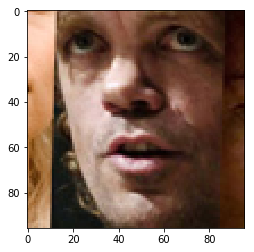

/Users/luzhoutao/anaconda/envs/python2.7/lib/python2.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{u'userID': u'1591799618'}


In [29]:
####################################################
# for showing the example
# this should be replaced with actual file open, while using this interface in production
import os
figure()
imshow(face_image)
show()
import tempfile
tmpfile = tempfile.TemporaryFile(mode='w+b')
face_image.save(tmpfile, format="JPEG")
tmpfile.seek(0)
####################################################

# request settings
host = 'https://face.d1.comp.nus.edu.sg/' # host address of our API
resource = 'commands/recognition/' # resource link

api_key = '1c125f503d6b3d17c7c741deae4859e3e8ea42f7' # your token
appID = '1430418428' # the appID of target app

# send request
files = {'face': tmpfile}
data = {'appID': appID}
headers = {'Authorization': 'Token '+api_key}
response = requests.post(os.path.join(host, resource), files=files, data=data, headers=headers, verify=False)

if response.status_code == '401':
    print('Invalid token!')
    
if not str(response.status_code).startswith('2'):
    print('error: ', response.status_code)
else:
    # receive response
    print(response.json())